##Library and PyPI

In [ ]:
# Install
!pip install geopandas
!pip install country_converter
!pip install geoplot

     |████████████████████████████████| 10.8 MB 8.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 39.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 25.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 219 kB 71.8 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516260 sha256=c6c20f9a8f3fa2f217f8ab58f32fb6dd1ff9c0e83953d52a495607051dd4efe1
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e

In [ ]:
# library
import numpy as np
import pandas as pd
import geopandas as geo
import geoplot as gplt
import matplotlib.pyplot as plt
import country_converter as coco

##Data Preprocessing

In [ ]:
# load data into the dataset
dataset = pd.read_csv("https://salaries.freshremote.work/download/salaries.csv")

In [ ]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022e,MI,FT,Cyber Threat Analyst,88000,USD,88000,US,100,US,L
1,2022e,SE,FT,DevOps Engineer,144000,CAD,113201,CA,100,CA,L
2,2021,SE,FT,Security Analyst,80000,USD,80000,US,100,US,S
3,2021,EN,FT,Security Analyst,50000,USD,50000,US,100,US,S
4,2022e,EN,FT,IT DevOps Engineer,30000,USD,30000,NG,100,US,M


In [ ]:
#see what world dataset are available
geo.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

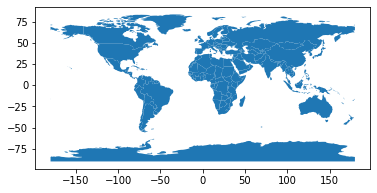

In [ ]:
# get information from world and city
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
cities = geo.read_file(geo.datasets.get_path('naturalearth_cities'))
nybb = geo.read_file(geo.datasets.get_path('nybb'))
world.plot()

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:1267: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in scaled_polygon:
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


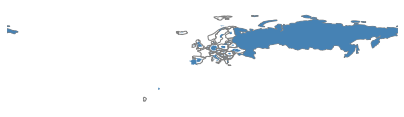

In [ ]:
world
europe = world.query('continent == "Europe"')

ax = gplt.cartogram(
    europe, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
gplt.polyplot(europe, edgecolor='gray', ax=ax)

# gplt.polyplot(europa, edgecolor='gray', ax=ax)

In [ ]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [ ]:
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
dataset.company_location

0       US
1       CA
2       US
3       US
4       US
        ..
1516    US
1517    US
1518    US
1519    US
1520    RU
Name: company_location, Length: 1521, dtype: object

In [ ]:
# We notice that the iso define in our salary dataset is different then the iso defined in world, so first we need to do merge these things together
iso = dataset.company_location
# remove duplicate and see what inside the list
iso = iso.drop_duplicates().to_list()

In [ ]:

converter = coco.CountryConverter()
iso3 = converter.convert(names = iso, src = 'ISO2', to = 'ISO3')
dataset = dataset.replace(iso, iso3)
dataset.head()

#add iso3 code to the world
world.loc[21,'iso_a3'] = 'NOR' 
world.loc[43,'iso_a3'] = 'FRA' 

####Split by year:

In [ ]:
dataset_2021 = dataset[dataset["work_year"] == '2021']
dataset_2021.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2021,SWE,FT,Security Analyst,80000,USD,80000,USA,100,USA,S
2,2021,EN,FT,Security Analyst,50000,USD,50000,USA,100,USA,S
4,2021,SWE,FT,IT Security Manager,138000,USD,138000,USA,100,USA,L
6,2021,MI,FT,Threat Intelligence Analyst,125000,USD,125000,USA,100,USA,L
7,2021,MI,FT,Information Security Manager,128000,USD,128000,USA,100,USA,L


In [ ]:
dataset_2020 = dataset[dataset["work_year"] == '2020']
dataset_2020.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11,2020,SWE,FT,DevOps Engineer,140000,USD,140000,USA,100,USA,L
26,2020,EN,FT,Cyber Security Analyst,425000,INR,5734,IND,100,IND,L
39,2020,SWE,FT,DevOps Engineer,95000,CAD,70859,CAN,50,CAN,S
46,2020,SWE,FT,DevOps Engineer,41000,GBP,52588,GBR,100,GBR,L
48,2020,MI,FT,DevOps Engineer,105000,CHF,111892,CHE,50,CHE,L


In [ ]:
dataset_2022e = dataset[dataset["work_year"] == '2022e']
dataset_2022e.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022e,SWE,FT,DevOps Engineer,144000,CAD,113201,CAN,100,CAN,L
3,2022e,EN,FT,IT DevOps Engineer,30000,USD,30000,NGA,100,USA,M
5,2022e,SWE,FT,Information Security Manager,310000,USD,310000,USA,100,USA,L
8,2022e,MI,FT,Information Security Manager,160000,USD,160000,USA,50,USA,L
16,2022e,MI,FT,Information Security Specialist,100000,AUD,71964,CAN,100,CAN,L


##Choropleth map

In [ ]:
# Cumulative numbers over countries
dataset_remote = (
    dataset.groupby(["company_location","work_year"])
    .sum()
    .reset_index()
)
display(dataset_remote)

# County IDs not in geometric data
dataset_remote_ids = dataset_remote.company_location.unique()
world_ids = world.iso_a3.unique()

# Find IDs only in one of the two county ID sets
unmatched_ids = np.setxor1d(dataset_remote_ids, world_ids) #-----> difference
print(f"Countries in the company location but not in the world: \n{dataset_remote [dataset_remote.company_location.isin(unmatched_ids)].company_location.unique()}")


,company_location,work_year,salary,salary_in_usd,remote_ratio
0,AFG,2021e,2000,2000,100
1,ARG,2020,62000,62000,150
2,ARG,2021e,90000,90000,50
3,ARM,2021e,36000,36000,50
4,ASM,2021e,1335000,18053,100
...,...,...,...,...,...
118,USA,2021,2510600,2510600,1950
119,USA,2021e,90908637,71306885,46700
120,USA,2022e,1205000,1205000,800
121,ZAF,2020,1250000,76010,150


Countries in the company location but not in the world: 
['ASM' 'MLT' 'SGP' 'UMI']


- "ASM": American Samoa
- "MLT": Malta
- "NOR": Norway
- "UMI": United States Minor Outlying Islands

In [ ]:
# find the lost one
world[world.name == "Singapore"] # there is no singapore in the world dataset
world[world.name == "Malta"] #no malta
world[world.name == "United States Minor Outlyng Islands"] #no
world[world.name == "American Samoa"] #no

,pop_est,continent,name,iso_a3,gdp_md_est,geometry


In [ ]:
# Merge into single data frame
dataset_remote_geo = dataset_remote.merge(
    world, how="inner", left_on="company_location", right_on="iso_a3"
)
dataset_remote_geo.drop(
    dataset_remote_geo.columns.difference(
        ["name","company_location", "salary_in_usd", "remote_ratio", "pop_est", "geometry",'work_year','continent']
    ),
    1,
    inplace=True,
)
display(dataset_remote_geo.head())

,company_location,work_year,salary_in_usd,remote_ratio,pop_est,continent,name,geometry
0,AFG,2021e,2000,100,34124811,Asia,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,ARG,2020,62000,150,44293293,South America,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
2,ARG,2021e,90000,50,44293293,South America,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
3,ARM,2021e,36000,50,3045191,Asia,Armenia,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
4,AUS,2020,718820,650,23232413,Oceania,Australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


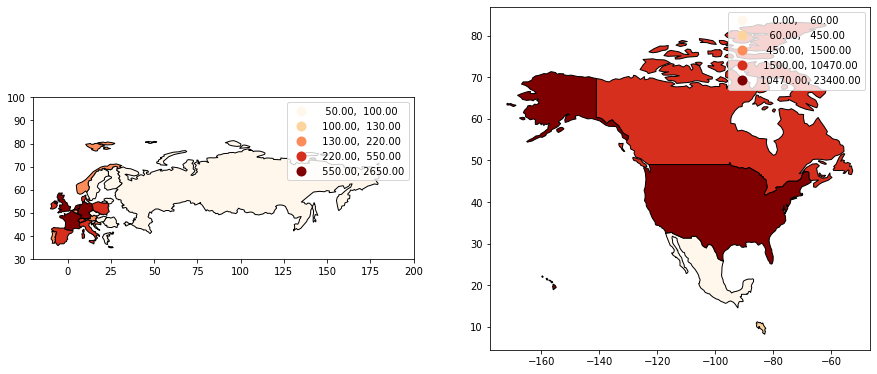

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
# Plot setup
fig, ax = plt.subplots(1, 2, figsize=[15,7])

# Plot map
geo_2020 = geo.GeoDataFrame(dataset_remote_geo[dataset_remote_geo.work_year == '2020'] [dataset_remote_geo.continent == "Europe"])
geo_2020.plot(
    column="remote_ratio",
    ax=ax[0],
    legend=True,
    vmin=0.,
    cmap='OrRd', 
    scheme='quantiles',
    edgecolor='black',
    
    
)
minx, miny, maxx, maxy = -20, 30, 200,100 
ax[0].set_xlim(minx, maxx)
ax[0].set_ylim(miny, maxy)
#--------------------------------------------------------------------
geo_2020_na = geo.GeoDataFrame(dataset_remote_geo[dataset_remote_geo.work_year == '2020'] [dataset_remote_geo.continent == 'North America'])
geo_2020_na.plot(
    column="remote_ratio",
    ax=ax[1],
    legend=True,
    vmin=0.,
    cmap='OrRd', 
    scheme='quantiles',
    edgecolor='black',   
)

plt.show()